# 1. Introduction

In this notebook we are going to deal with a supervised learning(learning with a teacher) problem called Regression.

## 1.1 Regression

It is a type of supervised learning method where the target variable is continuous. There are numerous techniques to solve such problems. In this notebook we are going to work on stocks data using **Linear Regression**.

### 1.1.1 Linear Regression

Linear Regression is a linear model that tries to make prediction by simply computing the weight of features including a bias term.

`y = b + w1*x1 + w2*x2 +....+ wn*xn`

# 2. Steps Involved:
    0. Importing the required libraries - for importing all the dependencies.
    1. Making functions of the required steps
    2. Importing dataset
    3. Exploratory Data Analysis (EDA) and Preprocessing - for checking the nature and structure of the dataset
    4. Feature Engineering - for getting features from the dataset
    5. Model Building - for building the model (using sklearn)
    6. Model Training - fitting the model for regression
    7. Model Testing
    8. Model Evaluation
    9. Saving the model - for re-use.
    10.Loading the model - for loading the trained model
    11.Inference - for checking the utility of the model

# 3. Prerequisites 

## 3.1 Dataset 
stocks.csv has been used as dataset which consist of 8 columns:
    1. close
    2. date
    3. high
    4. id
    5. low
    6. open
    7. ticker
    8. volume
    
## 3.2 Libraries Required
    pandas == 0.24.2
    matplotlib == 3.0.3
    scikit_learn == 0.21.2
    
# 4. Use Case
Some famous use cases of Linear Regression are :
    1. In retail it is used to predict sales of an outlet
    2. In healthcare, it is used to predict the number of dengue patients

## Step 0. Importing the required libraries

In [1]:
import pandas as pd

from matplotlib import pyplot as plt
from datetime import datetime

# Saving the model
import pickle

# Preprocessing and Training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Evaluation
from sklearn.metrics import mean_squared_error, r2_score

## Step 1. Making functions of the required steps

In [2]:
# FUNCTION FOR IMPORTING THE DATASET
# Input: path of the dataset (CSV)
# Output: dataframe 

def import_dataset(path):
    df = pd.read_csv(path)
    return df

In [3]:
# FUNCTION FOR CORRECTING DATATYPE OF DATE COLUMN
# Input: dataframe and column name
# Output: dataframe

def correct_dtype(df, col_name):
    df[col_name] = pd.to_datetime(df[col_name])
    return df

In [4]:
# FUNCTION FOR ANALYZING THE RELATED VALUES
# Input: dataframe
# Output: overlapped histogram of related features in our case

def plt_related(df):
    
    def plot_hist(feature1, feature2, alpha_1, alpha_2):
        plt.hist(stocks[feature1], label=feature1, alpha=alpha_1)
        plt.hist(stocks[feature2], label=feature2, alpha=alpha_2)
        plt.ylabel('stocks')
        plt.legend()
    
    plt.subplot(2, 1, 1)
    plot_hist('open', 'close', 0.5, 0.5)
    
    plt.subplot(2, 1, 2)
    plot_hist('low', 'high', 0.5, 0.5)
    plt.show()

In [5]:
# FUNCTION FOR CHECKING THE RANGE IN WHICH STOCK VOLUMES ARE TRADED
# Input: dataframe and column name
# Output: histogram of stock volume

def plt_stock_volume(df, col_name):
    plt.hist(stocks['volume'], color='#11ae22', alpha=0.7)
    plt.xlabel('volume')
    plt.ylabel('stocks')
    plt.show()

In [6]:
# FUNCTION FOR GENERATING FEATURE FROM DATE COLUMN
# Input: dataframe and column name
# Output: dataframe with new feature

def date_to_second(df, col_name):
    df['date_to_seconds'] = df[col_name].apply(lambda x: datetime.timestamp(x))
    df = df.drop(col_name, axis=1)
    
    return df

In [7]:
# FUNCTION FOR GETTING FEATURES AND TARGET
# Input: dataframe
# Output: features and target value as numpy array

def get_feature_target(df):
    # Features
    X = df.iloc[:, 1:].values
    # Target
    y = df.iloc[:, 0].values
    
    return X, y

In [8]:
# FUNCTION FOR SPLITTING DATASET INTO TRAIN AND TEST
# Input: Features and target variable
# Output: Splitted dataset into train and test

def split_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                        random_state=5)
    return X_train, X_test, y_train, y_test

In [9]:
# FUNCTION FOR SAVING THE MODEL
# Input: model object, file name
# Output: pickle file of the model

def save_pickle(model_object, pkl_name):
    file_pkl = open(pkl_name, 'wb')
    pickle.dump(model_object, file_pkl)
    file_pkl.close()

In [10]:
# FUNCTION FOR FEATURE SCALING
# Input: train and test features
# Output: scaled train and test features

def feature_scaling(X_train, X_test):
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    # Saving the learned scaler model
    save_pickle(sc, 'scaling_models/standard_scale.pkl')
    
    return X_train, X_test

In [11]:
# FUNCTION FOR MODEL BUILDING
# Input: null
# Output: model

def build_model():
    lin_reg = LinearRegression()
    return lin_reg

In [12]:
# FUNCTION FOR MODEL TRAINING
# Input: model object, training feature and training values
# Output: trained model

def train_model(lin_reg, X_train, y_train):
    lin_reg.fit(X_train, y_train)

In [13]:
# FUNCTION FOR MODEL TESTING
# Input: test set
# Output: predicted values

def test_model(lin_reg, X_test):
    # Predict values from the trained model
    y_pred = lin_reg.predict(X_test)
    return y_pred

In [14]:
# FUNCTION FOR MODEL EVALUATION
# Input: True values and predicted values
# Output: Score in terms of mean squared error and variance score

def eval_metrics(y_test, y_pred):
    # Evaluation metrices
    mse = mean_squared_error(y_test, y_pred)
    variance_score = r2_score(y_test, y_pred) 
    
    print("Mean Squared Error= {}".format(mse))
    print("Variance Score= {:.4f}".format(variance_score))

In [15]:
# FUNCTION FOR LOADING THE SAVED MODEL
# Input: pickle file name
# Output: model object

def load_model(pkl_name):
    pkl = open(pkl_name, 'rb')
    lin_reg = pickle.load(pkl)
    pkl.close()
    
    return lin_reg

## Step 2. Importing dataset

In [16]:
# Importing CSV
path = 'data/stocks.csv'
stocks = import_dataset(path)

## Step 3. Exploratory Data Analysis (EDA) and Preprocessing

In [17]:
# Checking the dataset
stocks.head() 

,close,date,high,id,low,open,ticker,volume
0,1.13401,2018-12-05 04:24:00,1.13403,19703898,1.1338,1.13400,EURUSD,100
1,1.13385,2018-12-05 04:25:00,1.13400,19703934,1.1338,1.13399,EURUSD,118
2,1.13384,2018-12-05 04:26:00,1.13394,19703958,1.1337,1.13388,EURUSD,63
3,1.13383,2018-12-05 04:27:00,1.13394,19703987,1.1337,1.13383,EURUSD,51
4,1.13370,2018-12-05 04:28:00,1.13390,19704015,1.1336,1.13390,EURUSD,32


In [18]:
# Checking the shape of the data
# First entry represent the number of rows and second represents the number of columns
stocks.shape

(1440, 8)

In [19]:
# Checking the structure of data
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 8 columns):
close     1440 non-null float64
date      1440 non-null object
high      1440 non-null float64
id        1440 non-null int64
low       1440 non-null float64
open      1440 non-null float64
ticker    1440 non-null object
volume    1440 non-null int64
dtypes: float64(4), int64(2), object(2)
memory usage: 90.1+ KB


In [20]:
# Correcting data type of date column
stocks = correct_dtype(stocks, col_name='date')

In [21]:
# Dropping the unnecessary columns
# id has all the unique values and ticker has only one value
stocks = stocks.drop(['id', 'ticker'], axis=1)

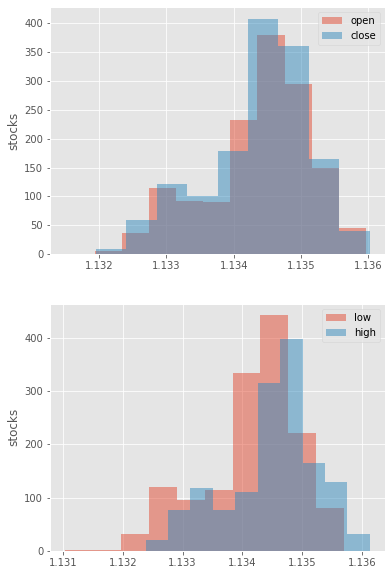

In [22]:
# Analyzing related values

# Plot style
plt.style.use('ggplot')

# Plot size
plt.rcParams['figure.figsize'] = [6, 10]

plt_related(stocks)

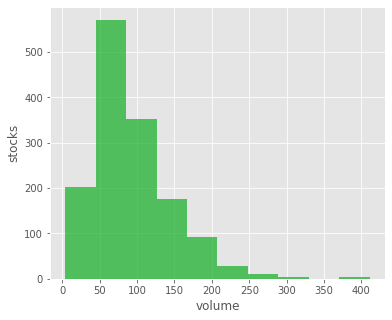

In [23]:
# Analyzing volume of stocks traded

# Plot size
plt.rcParams['figure.figsize'] = [6, 5]

plt_stock_volume(stocks, col_name='volume')

## Step 4. Feature Engineering

In [24]:
# Generating feature from date column
stocks = date_to_second(stocks, col_name='date')

In [25]:
# Separating features and target
X, y = get_feature_target(stocks)

In [26]:
# Splitting data into train and test set
X_train, X_test, y_train, y_test = split_data(X, y)

In [27]:
# Feature Scaling
X_train, X_test = feature_scaling(X_train, X_test)

## Step 5. Model Building

In [28]:
# Building the model
lin_reg = build_model()

## Step 6. Model Training

In [29]:
# Training the model
train_model(lin_reg, X_train, y_train)

## Step 7. Model Testing

In [30]:
# Testing the model
y_pred = test_model(lin_reg, X_test)

## Step 8. Model Evaluation

In [31]:
# Performance of the model
eval_metrics(y_test, y_pred)

Mean Squared Error= 8.209671025415955e-09
Variance Score= 0.9849


## Step 9. Saving the model

In [32]:
# Saving the trained model
save_pickle(lin_reg, 'models/stocks_regression.pkl')

## Step 10. Loading the model

In [33]:
# Loading the scaler and trained model
sc = load_model('scaling_models/standard_scale.pkl')
lin_reg = load_model('models/stocks_regression.pkl')

## Step 11. Inference

In [34]:
# Loading the test CSV
path = 'data/stocks_test.csv'
stocks_test = import_dataset(path)

In [35]:
# Checking the dataset
stocks_test.head()

,close,date,high,id,low,open,ticker,volume
0,1.13316,2018-12-06 02:48:00,1.13320,19740046,1.1328,1.13304,EURUSD,145
1,1.13315,2018-12-06 02:49:00,1.13333,19740083,1.1331,1.13310,EURUSD,168
2,1.13341,2018-12-06 02:50:00,1.13341,19740100,1.1331,1.13316,EURUSD,160
3,1.13330,2018-12-06 02:51:00,1.13346,19740136,1.1332,1.13341,EURUSD,107
4,1.13334,2018-12-06 02:52:00,1.13342,19740154,1.1331,1.13334,EURUSD,136


In [36]:
# Checking the shape of the data
# First entry represent the number of rows and second represents the number of columns
stocks_test.shape

(84, 8)

In [37]:
# Checking the structure of data
stocks_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 8 columns):
close     84 non-null float64
date      84 non-null object
high      84 non-null float64
id        84 non-null int64
low       84 non-null float64
open      84 non-null float64
ticker    84 non-null object
volume    84 non-null int64
dtypes: float64(4), int64(2), object(2)
memory usage: 5.3+ KB


In [38]:
# Correcting data type of date column
stocks_test = correct_dtype(stocks_test, col_name='date')

In [39]:
# Converting date to second
stocks_test = date_to_second(stocks_test, col_name='date')

In [40]:
# Dropping the unnecessary columns
stocks_test = stocks_test.drop(['id', 'ticker'], axis=1)

In [41]:
# Separating features and target
stocks_test_X, stocks_test_y = get_feature_target(stocks_test)

In [42]:
# Feature scaling
stocks_test_X = sc.transform(stocks_test_X)

In [43]:
# Predicting the values
stocks_test_y_pred = lin_reg.predict(stocks_test_X)

In [44]:
# Measuring the score
eval_metrics(stocks_test_y, stocks_test_y_pred)

Mean Squared Error= 1.3098394718597799e-08
Variance Score= 0.8658
